In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

In [4]:
ds = xr.open_dataset('1993\dt_global_allsat_phy_l4_19930101_20210726.nc'
                     
                     )

In [5]:
#load data
MKE_final = np.load('MKE_final.npy')
mean_TKE_final = np.load('mean_TKE_final.npy')
mean_EKE_final = np.load('mean_EKE_final.npy')

mean_EKE_final = mean_EKE_final /1025 *10**4
mean_TKE_final = mean_TKE_final /1025 *10**4
MKE_final = MKE_final /1025 *10**4

In [6]:
#calculate the 90th spatial percentile on the mean EKE field
mean_EKE_final_90 = np.nanpercentile(mean_EKE_final, 90)
print(mean_EKE_final_90)

# Create a mask for regions where EKE_final > 90th percentile
region = mean_EKE_final.copy()
region[region < mean_EKE_final_90] = np.nan
region[region >= mean_EKE_final_90] = 1

region = region.T


454.4372903894805


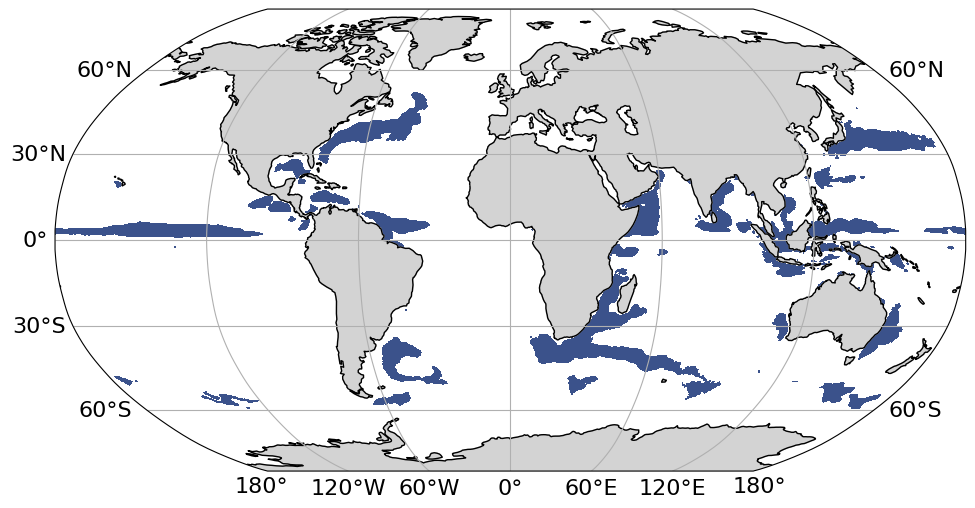

In [7]:
#plot the mean EKE field regions with EKE > 90th percentile
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

longitude, latitude = np.meshgrid(ds.longitude, ds.latitude)

plt.figure(figsize=(50, 6))

#bounds = np.arange(0, 400, 25)
cmp = plt.get_cmap('viridis')
#norm = mpl.colors.BoundaryNorm(bounds, cmp.N)

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region, cmap=cmp, transform=ccrs.PlateCarree())

plt.show()

Contour path coordinates (longitude, latitude):
[[-179.875    1.75 ]
 [-179.75     1.875]
 [-179.625    2.   ]
 ...
 [-179.625    4.   ]
 [-179.75     4.125]
 [-179.875    4.25 ]]
Contour path coordinates (longitude, latitude):
[[179.875   4.25 ]
 [179.625   4.25 ]
 [179.375   4.25 ]
 [179.125   4.25 ]
 [178.875   4.25 ]
 [178.625   4.25 ]
 [178.5     4.375]
 [178.375   4.5  ]
 [178.125   4.5  ]
 [177.875   4.5  ]
 [177.625   4.5  ]
 [177.375   4.5  ]
 [177.125   4.5  ]
 [176.875   4.5  ]
 [176.625   4.5  ]
 [176.375   4.5  ]
 [176.25    4.625]
 [176.125   4.75 ]
 [175.875   4.75 ]
 [175.625   4.75 ]
 [175.375   4.75 ]
 [175.125   4.75 ]
 [174.875   4.75 ]
 [174.75    4.625]
 [174.625   4.5  ]
 [174.375   4.5  ]
 [174.125   4.5  ]
 [173.875   4.5  ]
 [173.625   4.5  ]
 [173.375   4.5  ]
 [173.125   4.5  ]
 [172.875   4.5  ]
 [172.625   4.5  ]
 [172.375   4.5  ]
 [172.125   4.5  ]
 [171.875   4.5  ]
 [171.625   4.5  ]
 [171.375   4.5  ]
 [171.25    4.375]
 [171.125   4.25 ]
 [170.875   

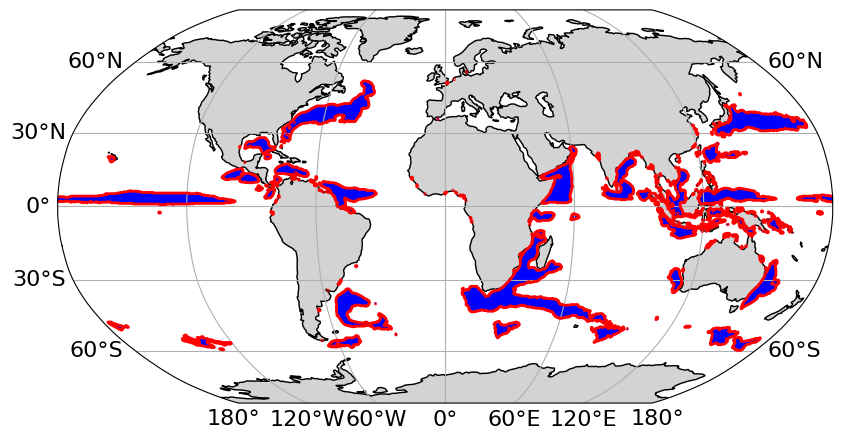

In [8]:
#plot a contour around the high energy regions
import matplotlib.colors as mcolors


# Replace NaN values with 0
region = np.nan_to_num(region, nan=0)

# Create a custom colormap
colors = ['white', 'blue']
cmap = mcolors.ListedColormap(colors)

#plot the small region
plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

contour_plot = ax.contourf(longitude, latitude, region, cmap = cmap,transform=ccrs.PlateCarree())
contour_line = ax.contour(longitude, latitude, region, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())

# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Extract and print the coordinates of the contour paths
for path in contour_paths:
    coordinates = path.vertices
    print("Contour path coordinates (longitude, latitude):")
    print(coordinates)

plt.show()

In [9]:
from shapely.geometry import Polygon
from pyproj import Proj, transform


# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Initialize a list to store polygons
polygons = []

# Define the projection for area preservation (e.g., Equal Earth)
projection = ccrs.EqualEarth()

# Convert contour paths to polygons and reproject coordinates
for path in contour_paths:
    coordinates = path.vertices
    # Reproject the coordinates to Equal Earth projection
    projected_coords = []
    for lon, lat in coordinates:
        x, y = projection.transform_point(lon, lat, ccrs.PlateCarree())  # Transform to Equal Earth
        projected_coords.append((x, y))
    
    # Create a Shapely polygon from the projected coordinates
    polygon = Polygon(projected_coords)
    polygons.append(polygon)

# Calculate the area for each polygon (in square kilometers)
for i, polygon in enumerate(polygons):
    area = polygon.area  # Calculate the area of the individual polygon in square degrees
    print(f"Area of contour {i + 1}: {area} square degrees")

    # Convert square degrees to square kilometers
    # 1 degree^2 = 12355.6 km^2 at the equator (approximation)
    area_km2 = area * 12355.6  # Simple approximation based on the equator
    print(f"Area of contour {i + 1}: {area_km2} square kilometers")

plt.show()


Area of contour 1: 3510548282330.803 square degrees
Area of contour 1: 4.337493035716647e+16 square kilometers
Area of contour 2: 355728570669.25464 square degrees
Area of contour 2: 4395239927761042.5 square kilometers
Area of contour 3: 276160969053.12964 square degrees
Area of contour 3: 3412134469232848.5 square kilometers
Area of contour 4: 4571426016.532084 square degrees
Area of contour 4: 56482711289863.83 square kilometers
Area of contour 5: 248477301842.4016 square degrees
Area of contour 5: 3070086150643977.5 square kilometers
Area of contour 6: 339596027023.5488 square degrees
Area of contour 6: 4195912671492160.0 square kilometers
Area of contour 7: 535059253114.21387 square degrees
Area of contour 7: 6610978107777981.0 square kilometers
Area of contour 8: 212190948.3887812 square degrees
Area of contour 8: 2621746481912.425 square kilometers
Area of contour 9: 42623376309.768486 square degrees
Area of contour 9: 526637388332975.5 square kilometers
Area of contour 10: 4274

Contour with area 5852307.16 km² is included.
Contour with area 606968.85 km² is included.
Contour with area 1030148.15 km² is included.
Contour with area 12355.60 km² is excluded.
Contour with area 1431705.15 km² is included.
Contour with area 1248687.82 km² is included.
Contour with area 1575339.00 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 203867.40 km² is excluded.
Contour with area 1455644.12 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 1167604.20 km² is included.
Contour with area 3088.90 km² is excluded.
Contour with area 3088.90 km² is excluded.
Contour with area 1544.45 km² is excluded.
Contour with area 259467.60 km² is excluded.
Contour with area 27027.88 km² is excluded.
Contour with area 5723731.70 km² is included.
Contour with area 4633.35 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 11583.38 km² is excluded.
Contour with area 16988.95 km² is excluded.
Contour with area 39287

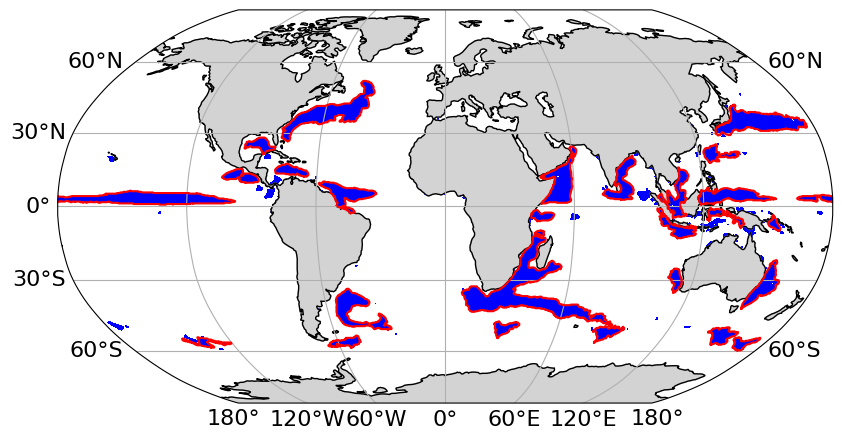

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.path import Path


reference_area_km2 = 4 * 10**5  


plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Plot the contour
contour_plot = ax.contourf(longitude, latitude, region, cmap=cmap, transform=ccrs.PlateCarree())
#contour_line = ax.contour(longitude, latitude, region, levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree())

# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Filter out the paths smaller than the reference area
filtered_paths = []
for path in contour_paths:
    # Get the path vertices
    vertices = path.vertices
    # Calculate the area of the contour by using the path's bounding box
    min_lon, min_lat = np.min(vertices, axis=0)
    max_lon, max_lat = np.max(vertices, axis=0)
    
    # Approximate the area (bounding box approach) in square degrees
    area_deg2 = (max_lon - min_lon) * (max_lat - min_lat)  # area in degrees^2
    
    # Convert area in square degrees to square kilometers (approximation)
    area_km2 = area_deg2 * 12355.6  
    
    if area_km2 >= reference_area_km2:
        filtered_paths.append(path)
        print(f"Contour with area {area_km2:.2f} km² is included.")
    else:
        print(f"Contour with area {area_km2:.2f} km² is excluded.")

# Plot only the remaining large contours
for path in filtered_paths:
    coords = path.vertices
    ax.plot(coords[:, 0], coords[:, 1], color='red', linewidth=1.5, transform=ccrs.PlateCarree())

plt.show()


In [11]:
'''reference_area_km2 = 4 * 10**5  

# Define the latitude range near the equator to exclude
equator_lat_range = (-5, 5)  # ±5° latitude


# Access the contour paths to get the coordinates
contour_paths = contour_line.collections[0].get_paths()

# Filter out the paths based on area and proximity to the equator
filtered_paths = []
for path in contour_paths:
    # Get the path vertices
    vertices = path.vertices
    # Calculate the area of the contour by using the path's bounding box
    min_lon, min_lat = np.min(vertices, axis=0)
    max_lon, max_lat = np.max(vertices, axis=0)
    
    # Approximate the area (bounding box approach) in square degrees
    area_deg2 = (max_lon - min_lon) * (max_lat - min_lat)  # area in degrees^2
    
    # Convert area in square degrees to square kilometers (approximation)
    area_km2 = area_deg2 * 12355.6  
    
    # Check if the contour is within the specified latitude range near the equator
    if np.any((vertices[:, 1] >= equator_lat_range[0]) & (vertices[:, 1] <= equator_lat_range[1])):
        print(f"Contour near the equator (excluded).")
        continue  # Skip this contour if it's near the equator
    
    # Check if the contour is large enough
    if area_km2 >= reference_area_km2:
        filtered_paths.append(path)
        print(f"Contour with area {area_km2:.2f} km² is included.")
    else:
        print(f"Contour with area {area_km2:.2f} km² is excluded.")
'''

Contour near the equator (excluded).
Contour near the equator (excluded).
Contour with area 1030148.15 km² is included.
Contour with area 12355.60 km² is excluded.
Contour with area 1431705.15 km² is included.
Contour with area 1248687.82 km² is included.
Contour with area 1575339.00 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 203867.40 km² is excluded.
Contour with area 1455644.12 km² is included.
Contour with area 772.23 km² is excluded.
Contour with area 1167604.20 km² is included.
Contour with area 3088.90 km² is excluded.
Contour with area 3088.90 km² is excluded.
Contour with area 1544.45 km² is excluded.
Contour with area 259467.60 km² is excluded.
Contour with area 27027.88 km² is excluded.
Contour with area 5723731.70 km² is included.
Contour with area 4633.35 km² is excluded.
Contour with area 772.23 km² is excluded.
Contour with area 11583.38 km² is excluded.
Contour with area 16988.95 km² is excluded.
Contour with area 39287719.10 km² is inc

In [16]:
# Define the geographical bounds for the currents
currents = {
    "Gulf Stream": {"lat_range": (30, 50), "lon_range": (-80, -50)}, 
    "Agulhas Current": {"lat_range": (-40, -30), "lon_range": (10, 40)},  
    "Kuroshio Extension": {"lat_range": (30, 45), "lon_range": (120, 160)},  
    "GWSE" : {"lat_range": (0, 30), "lon_range": (30, 60)},
    "Loop Current": {"lat_range": (18, 32), "lon_range": (-92, -78)},
    "BMC": {"lat_range": (-50, -30), "lon_range": (-60, 0)},
    "EAC": {"lat_range": (-40, -30), "lon_range": (140, 170)},
}

# Initialize a dictionary to store the coordinates for each current
currents_coords = {current_name: [] for current_name in currents}

# Filter the paths and extract coordinates for each region
it = 0
#for path in contour_line.collections[0].get_paths():
for path in filtered_paths:
    coords = path.vertices

    # Loop over each current's bounds
    for current_name, bounds in currents.items():
        lat_in_range = (coords[:, 1] >= bounds["lat_range"][0]) & (coords[:, 1] <= bounds["lat_range"][1])
        lon_in_range = (coords[:, 0] >= bounds["lon_range"][0]) & (coords[:, 0] <= bounds["lon_range"][1])
        
        # If any of the contour's coordinates fall within the region of interest, store the coordinates
        if np.any(lat_in_range & lon_in_range):
            it += 1
            currents_coords[current_name].append(coords)
            print(f"Contour coordinates for {current_name} extracted.")
            break  # Stop checking other currents once it's labeled

# Optionally: Convert the list of coordinates to numpy arrays for each current
for current_name in currents_coords:
    if currents_coords[current_name]:
        currents_coords[current_name] = np.array(currents_coords[current_name][0])  # Take the first match
    else:
        currents_coords[current_name] = None  # No matching contour found for this current
print(it)

Contour coordinates for BMC extracted.
Contour coordinates for Agulhas Current extracted.
Contour coordinates for EAC extracted.
Contour coordinates for GWSE extracted.
Contour coordinates for Loop Current extracted.
Contour coordinates for Gulf Stream extracted.
Contour coordinates for Kuroshio Extension extracted.
7


Contour labeled as BMC
Contour labeled as Agulhas Current
Contour labeled as EAC
Contour labeled as GWSE
Contour labeled as Loop Current
Contour labeled as Gulf Stream
Contour labeled as Kuroshio Extension


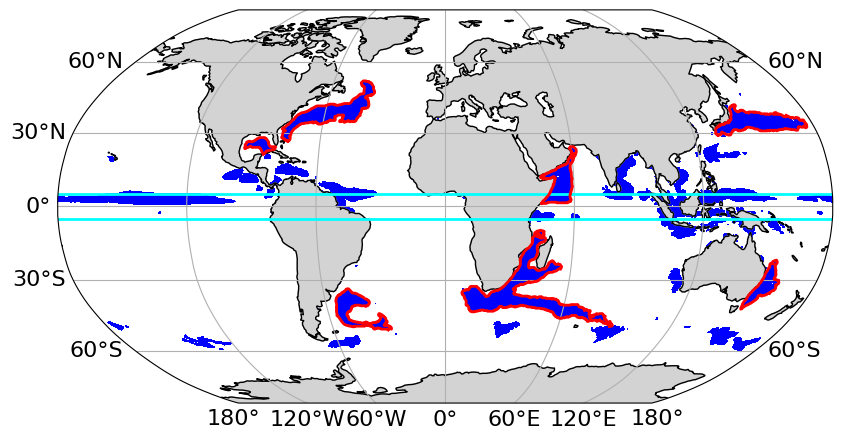

7


In [17]:

plt.figure(figsize=(10, 6))

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Plot the contour
contour_plot = ax.contourf(longitude, latitude, region, cmap=cmap, transform=ccrs.PlateCarree())


# Add cyan lines at ±5° latitude
ax.plot([longitude.min(), longitude.max()], [5, 5], color='cyan', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([longitude.min(), longitude.max()], [-5, -5], color='cyan', linewidth=2, transform=ccrs.PlateCarree())

it = 0
# Label and plot the contours based on their geographical region
for path in filtered_paths:
    coords = path.vertices
    # Check if the contour is in the region of interest (currents)
    for current_name, bounds in currents.items():
        lat_in_range = (coords[:, 1] >= bounds["lat_range"][0]) & (coords[:, 1] <= bounds["lat_range"][1])
        lon_in_range = (coords[:, 0] >= bounds["lon_range"][0]) & (coords[:, 0] <= bounds["lon_range"][1])
        
        # If any of the contour's coordinates fall within the region of interest, label it
        if np.any(lat_in_range & lon_in_range):
            ax.plot(coords[:, 0], coords[:, 1], color='red', linewidth=2, transform=ccrs.PlateCarree())
            it += 1
            print(f"Contour labeled as {current_name}")
            break  # Stop checking other currents once it's labeled
plt.show()
print(it)

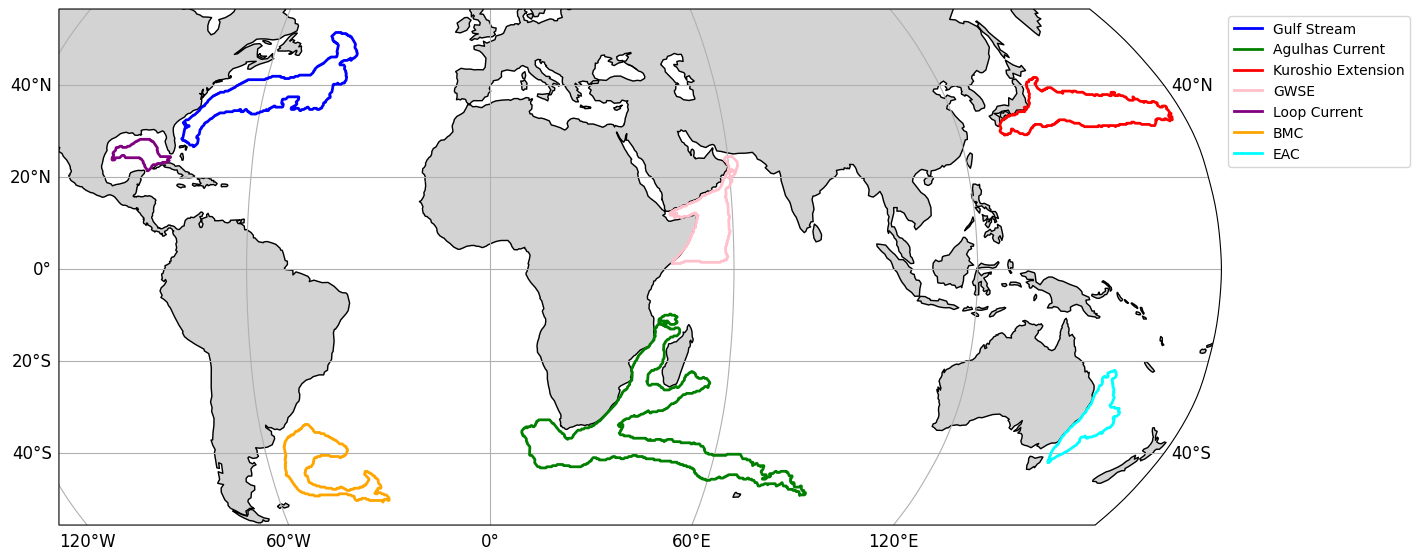

In [18]:

plt.figure(figsize=(15, 8))  

ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

# Add land and coastline features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Improve grid label visibility
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Define current colors
colors = {'Gulf Stream': 'blue', 'Agulhas Current': 'green', 'Kuroshio Extension': 'red', 
          "GWSE": 'pink', "Loop Current": 'purple', "BMC": 'orange', "EAC": 'cyan'}

# Plot each current's coordinates
for current_name, coords in currents_coords.items():
    if coords is not None:
        ax.plot(coords[:, 0], coords[:, 1], label=current_name, 
                color=colors.get(current_name, 'black'), linewidth=2, transform=ccrs.PlateCarree())


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


# Cálculo %

In [19]:
#load data
MKE_final = np.load('MKE_final.npy')
mean_TKE_final = np.load('mean_TKE_final.npy')
mean_EKE_final = np.load('mean_EKE_final.npy')

mean_EKE_final = mean_EKE_final /1025 *10**4
mean_TKE_final = mean_TKE_final /1025 *10**4
MKE_final = MKE_final /1025 *10**4

mean_EKE_final = mean_EKE_final.T
mean_TKE_final = mean_TKE_final.T
MKE_final = MKE_final.T

gulf_stream_coords = currents_coords["Gulf Stream"]
Agulhas_Current_coords = currents_coords["Agulhas Current"]
Kuroshio_Extension_coords = currents_coords["Kuroshio Extension"]
GWSE_coords = currents_coords["GWSE"]
Loop_Current_coords = currents_coords["Loop Current"]
BMC_coords = currents_coords["BMC"]
EAC_coords = currents_coords["EAC"]


# Create a Path object for the Gulf Stream contour
gulf_stream_path = Path(gulf_stream_coords)
Agulhas_Current_path = Path(Agulhas_Current_coords)
Kuroshio_Extension_path = Path(Kuroshio_Extension_coords)
GWSE_path = Path(GWSE_coords)
Loop_Current_path = Path(Loop_Current_coords) 
BMC_path = Path(BMC_coords)
EAC_path = Path(EAC_coords)

# Flatten the grids and stack them as (lon, lat) pairs
points = np.vstack((longitude.flatten(), latitude.flatten())).T

# Create a mask for points inside the Gulf Stream contour
mask_gulf = gulf_stream_path.contains_points(points).reshape(latitude.shape)
mask_agulhas = Agulhas_Current_path.contains_points(points).reshape(latitude.shape)
mask_kuroshio = Kuroshio_Extension_path.contains_points(points).reshape(latitude.shape)
mask_GWSE = GWSE_path.contains_points(points).reshape(latitude.shape)
mask_loop = Loop_Current_path.contains_points(points).reshape(latitude.shape)
mask_BMC = BMC_path.contains_points(points).reshape(latitude.shape)
mask_EAC = EAC_path.contains_points(points).reshape(latitude.shape)

# Apply the mask to the kinetic energy array
mean_EKE_gulf_stream = np.where(mask_gulf, mean_EKE_final, np.nan)
mean_TKE_gulf_stream = np.where(mask_gulf, mean_TKE_final, np.nan)
MKE_gulf_stream = np.where(mask_gulf, MKE_final, np.nan)


mean_EKE_agulhas = np.where(mask_agulhas, mean_EKE_final, np.nan)
mean_TKE_agulhas = np.where(mask_agulhas, mean_TKE_final, np.nan)
MKE_agulhas = np.where(mask_agulhas, MKE_final, np.nan)

mean_EKE_kuroshio = np.where(mask_kuroshio, mean_EKE_final, np.nan)
mean_TKE_kuroshio = np.where(mask_kuroshio, mean_TKE_final, np.nan)
MKE_kuroshio = np.where(mask_kuroshio, MKE_final, np.nan)

mean_EKE_GWSE = np.where(mask_GWSE, mean_EKE_final, np.nan)
mean_TKE_GWSE = np.where(mask_GWSE, mean_TKE_final, np.nan)
MKE_GWSE = np.where(mask_GWSE, MKE_final, np.nan)

mean_EKE_loop = np.where(mask_loop, mean_EKE_final, np.nan)
mean_TKE_loop = np.where(mask_loop, mean_TKE_final, np.nan)
MKE_loop = np.where(mask_loop, MKE_final, np.nan)

mean_EKE_BMC = np.where(mask_BMC, mean_EKE_final, np.nan)
mean_TKE_BMC = np.where(mask_BMC, mean_TKE_final, np.nan)
MKE_BMC = np.where(mask_BMC, MKE_final, np.nan)

mean_EKE_EAC = np.where(mask_EAC, mean_EKE_final, np.nan)
mean_TKE_EAC = np.where(mask_EAC, mean_TKE_final, np.nan)
MKE_EAC = np.where(mask_EAC, MKE_final, np.nan)

In [20]:

mask_gulf_01 = np.zeros(mask_gulf.shape)
mask_gulf_01[mask_gulf==False] = 0
mask_gulf_01[mask_gulf==True] = 1
mask_gulf_01



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\Users\mrpal\AppData\Local\Temp\ipykernel_9648\2699599176.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


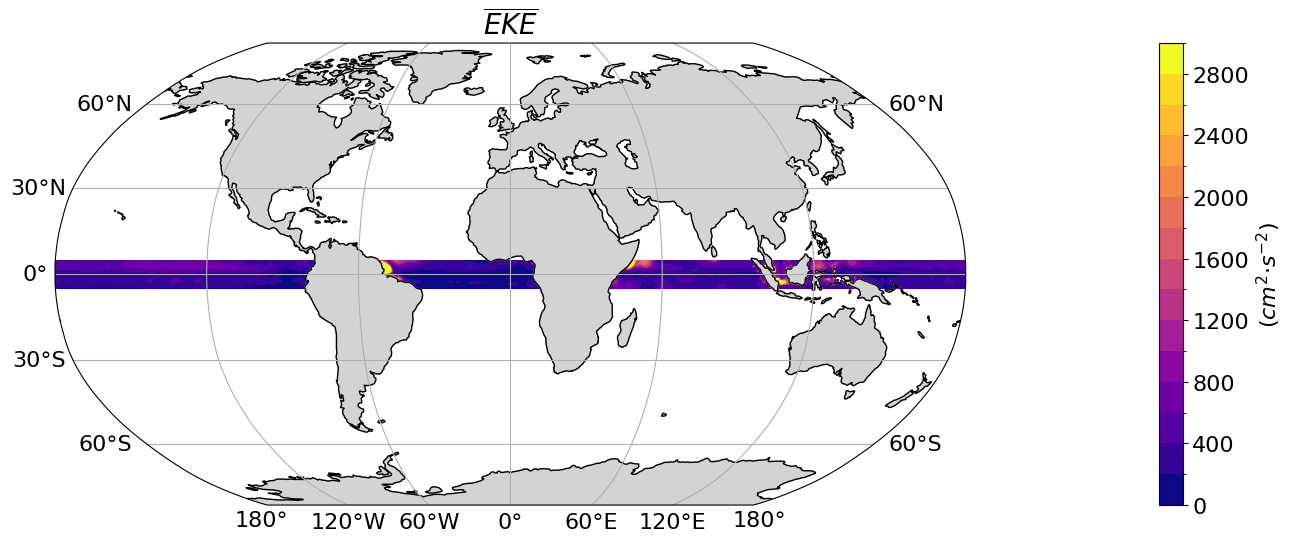

In [21]:
#create a region mask for +- 5 degrees around the equator

mask_equator = np.zeros(mean_EKE_final.shape)
mask_equator[(latitude >= -5) & (latitude <= 5)] = 1
mask_equator

# Apply the mask to the kinetic energy array
mean_EKE_equator = np.where(mask_equator, mean_EKE_final, np.nan)
mean_TKE_equator = np.where(mask_equator, mean_TKE_final, np.nan)
MKE_equator = np.where(mask_equator, MKE_final, np.nan)

plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_equator , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()




In [23]:
mask_all_regions = mask_gulf + mask_agulhas + mask_kuroshio + mask_GWSE + mask_loop + mask_BMC + mask_EAC + mask_equator
mask_all_regions_01 = np.zeros(mask_all_regions.shape)
mask_all_regions_01[mask_all_regions==False] = 1
mask_all_regions_01[mask_all_regions==True] = 0

mask_rest_regions = mask_all_regions_01


# Apply the mask to the kinetic energy array
mean_EKE_rest_regions = np.where(mask_rest_regions, mean_EKE_final, np.nan)
mean_TKE_rest_regions = np.where(mask_rest_regions, mean_TKE_final, np.nan)
MKE_rest_regions = np.where(mask_rest_regions, MKE_final, np.nan)

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\92097908.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


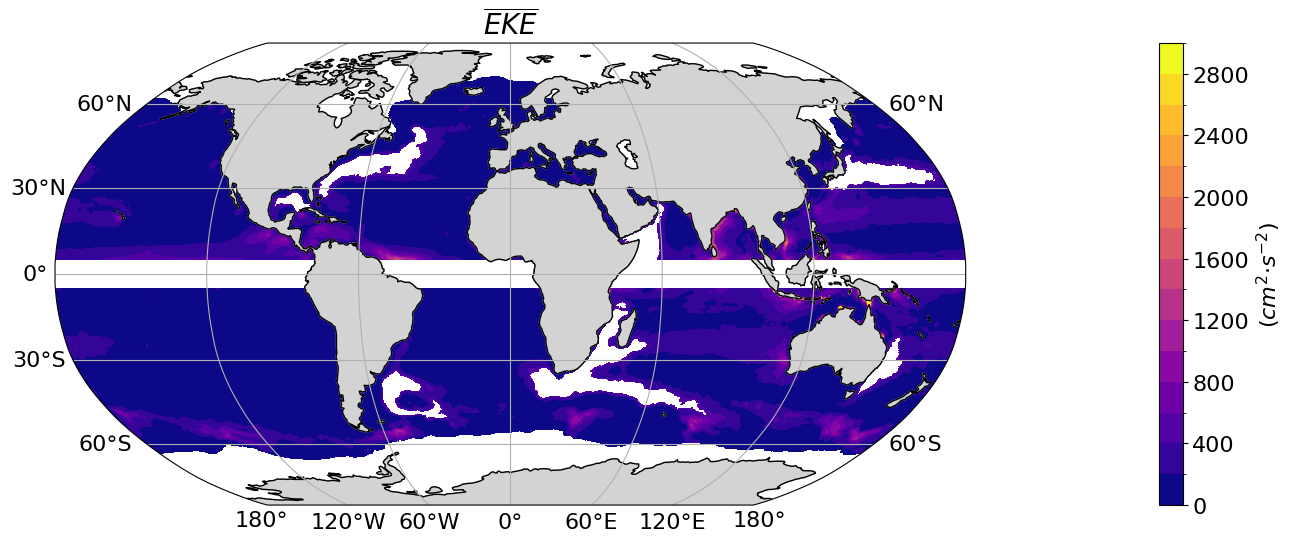

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\92097908.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


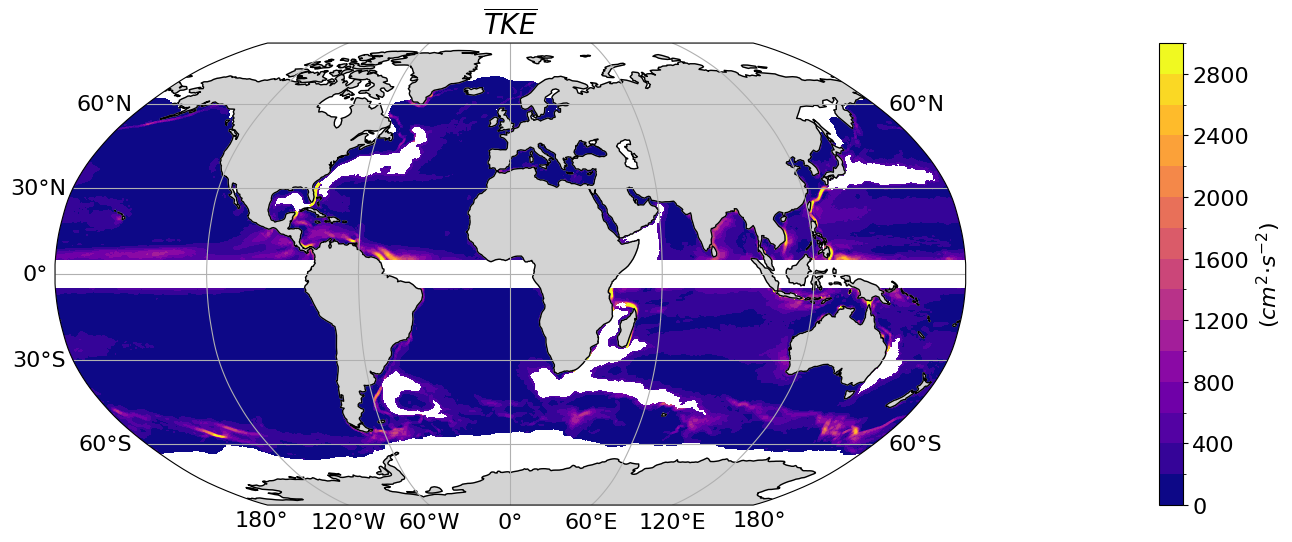

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\92097908.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


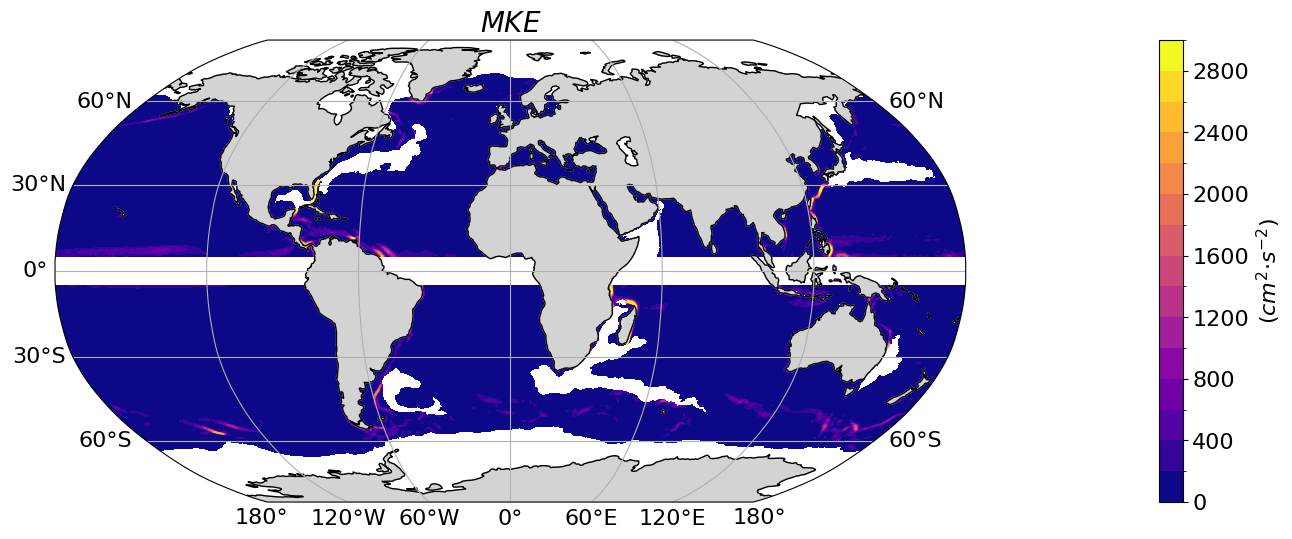

In [51]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_rest_regions , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_rest_regions , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_rest_regions , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

## Plots

C:\Users\mrpal\AppData\Local\Temp\ipykernel_12328\3196879897.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


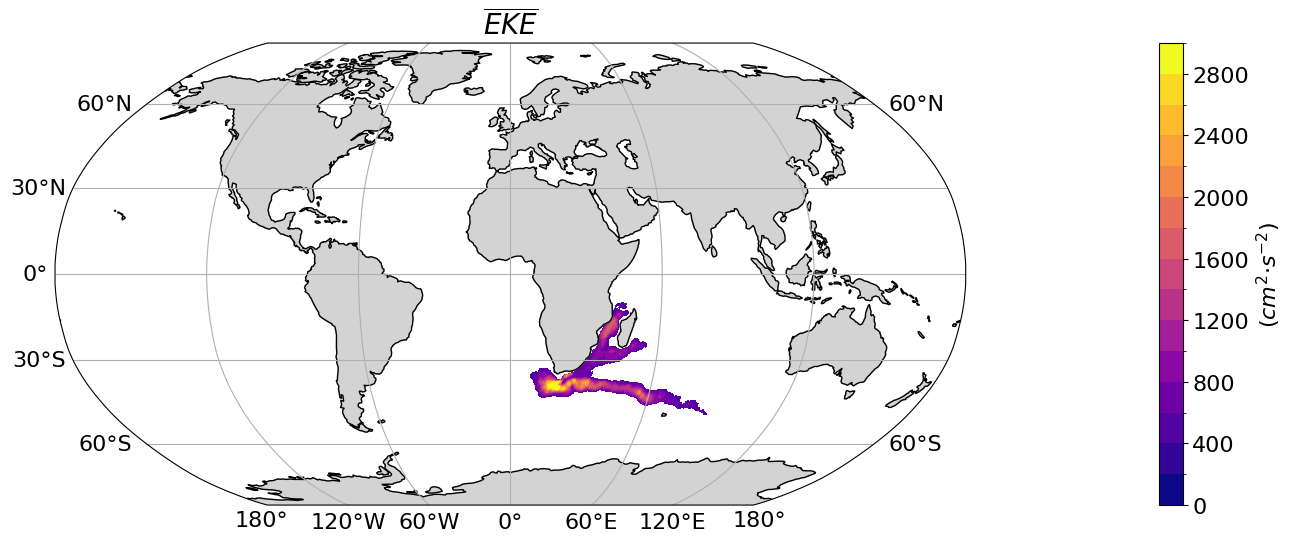

C:\Users\mrpal\AppData\Local\Temp\ipykernel_12328\3196879897.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


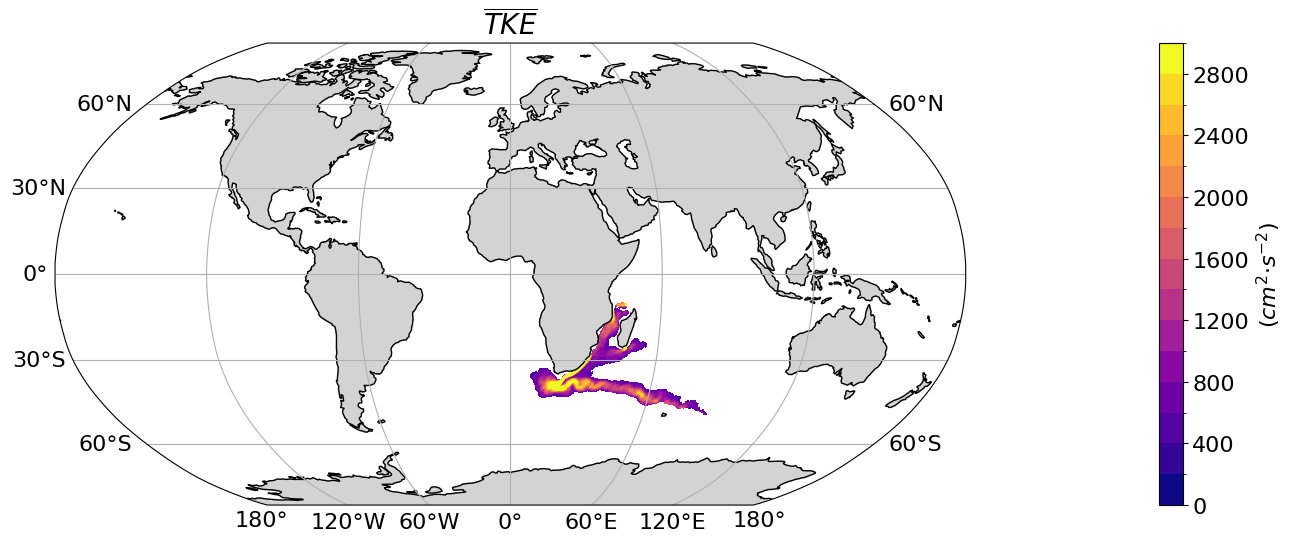

C:\Users\mrpal\AppData\Local\Temp\ipykernel_12328\3196879897.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


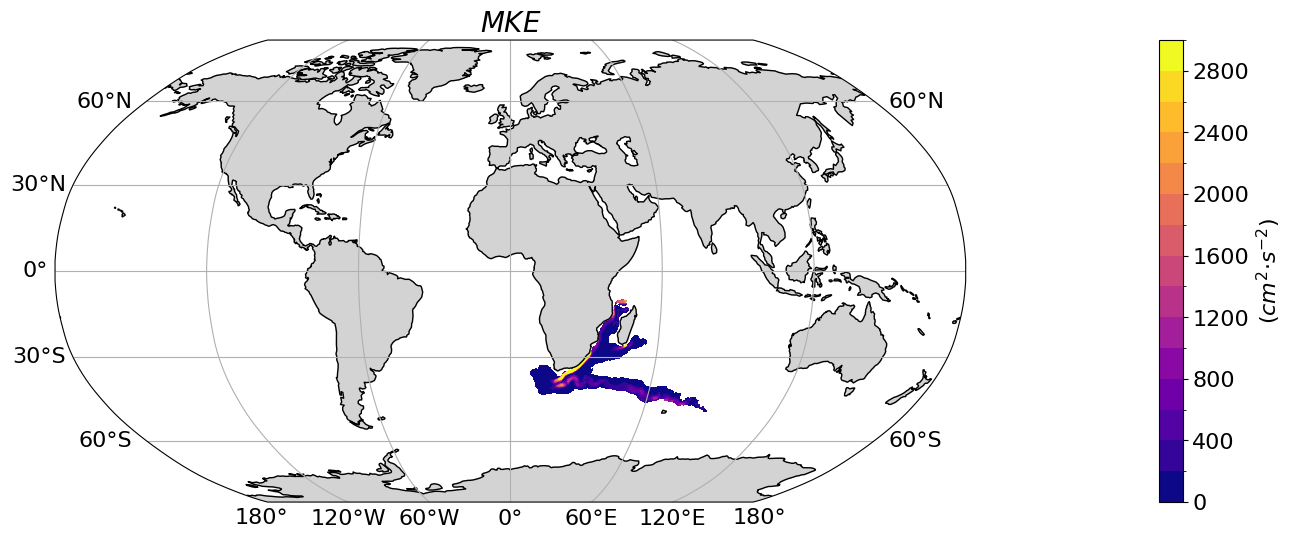

In [35]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_agulhas , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_agulhas , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_agulhas , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\1739827097.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


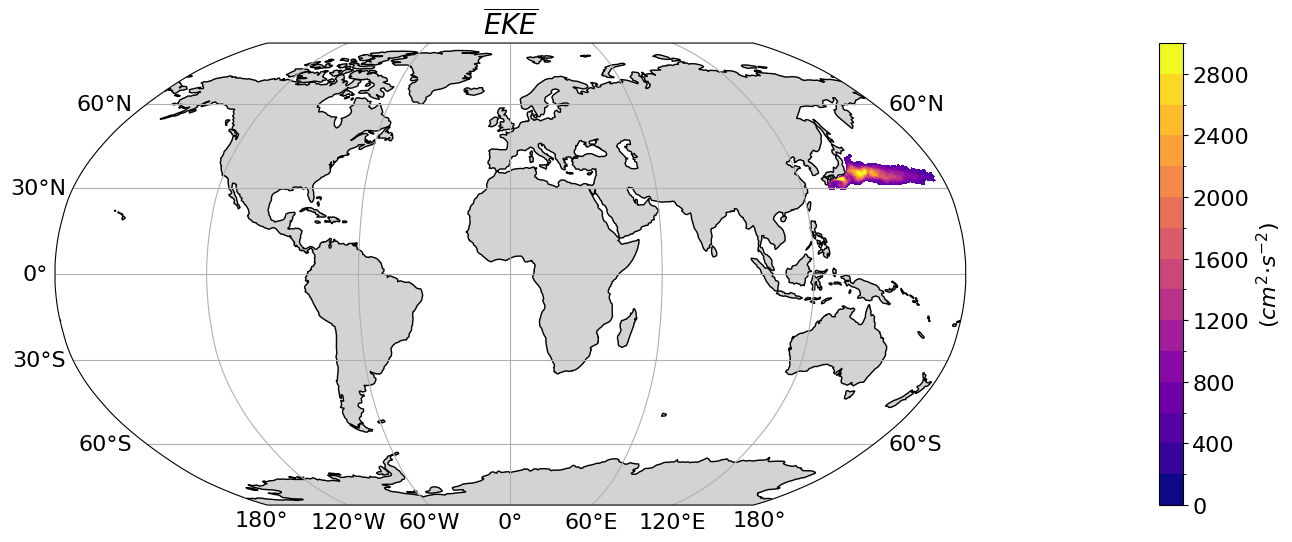

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\1739827097.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


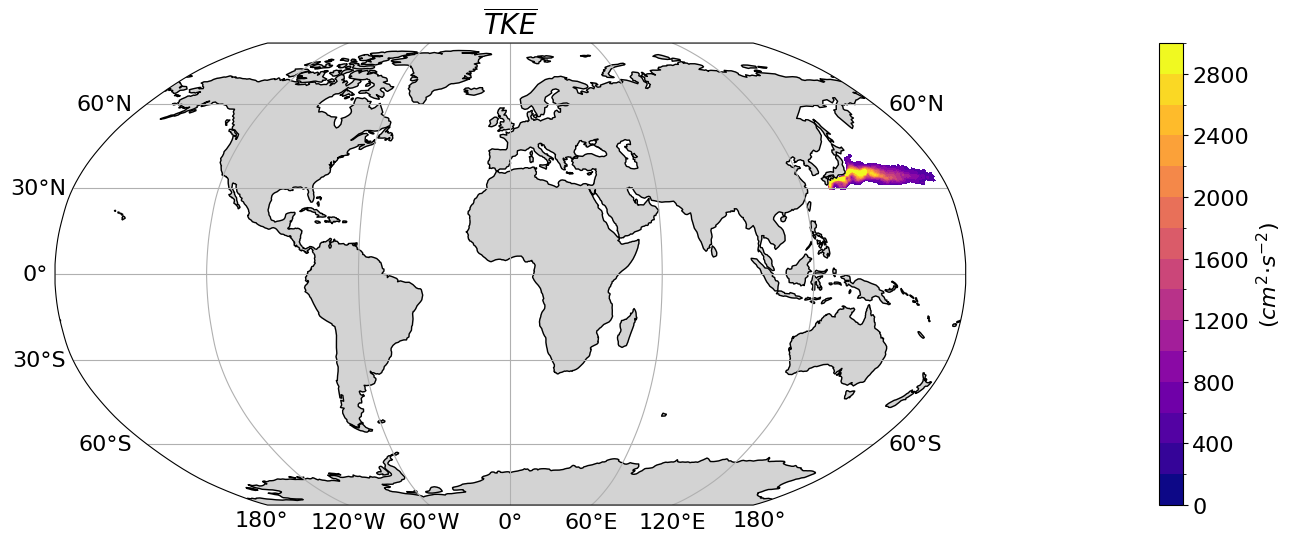

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\1739827097.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


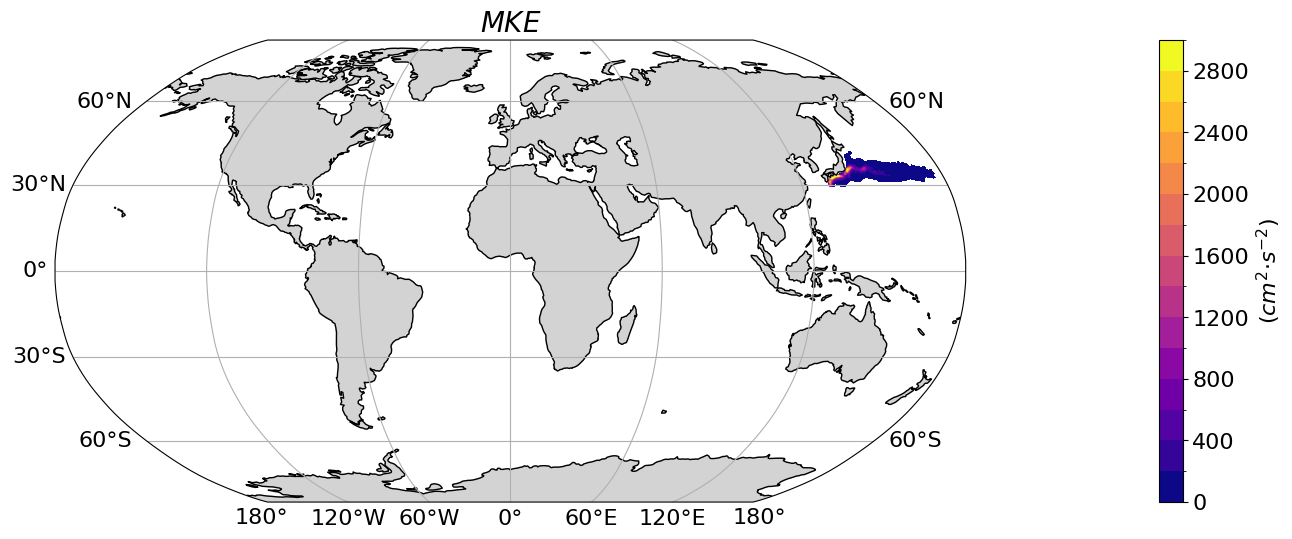

In [27]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_kuroshio , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_kuroshio , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_kuroshio , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\1727196735.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\1727196735.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\1727196735.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


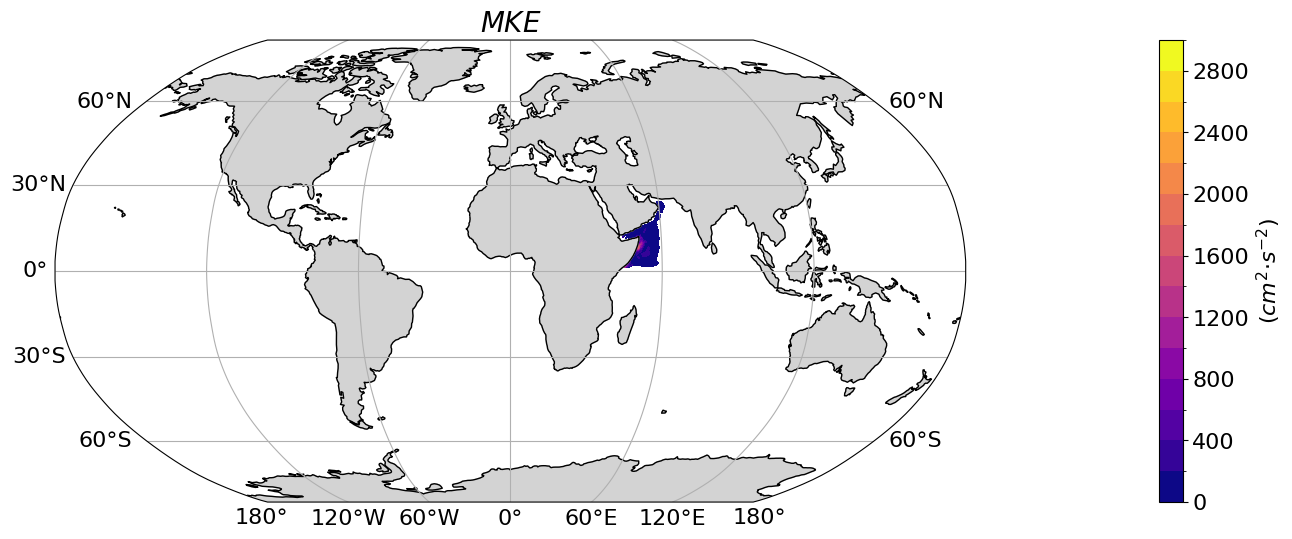

In [37]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_GWSE , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_GWSE , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_GWSE , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\3340335904.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


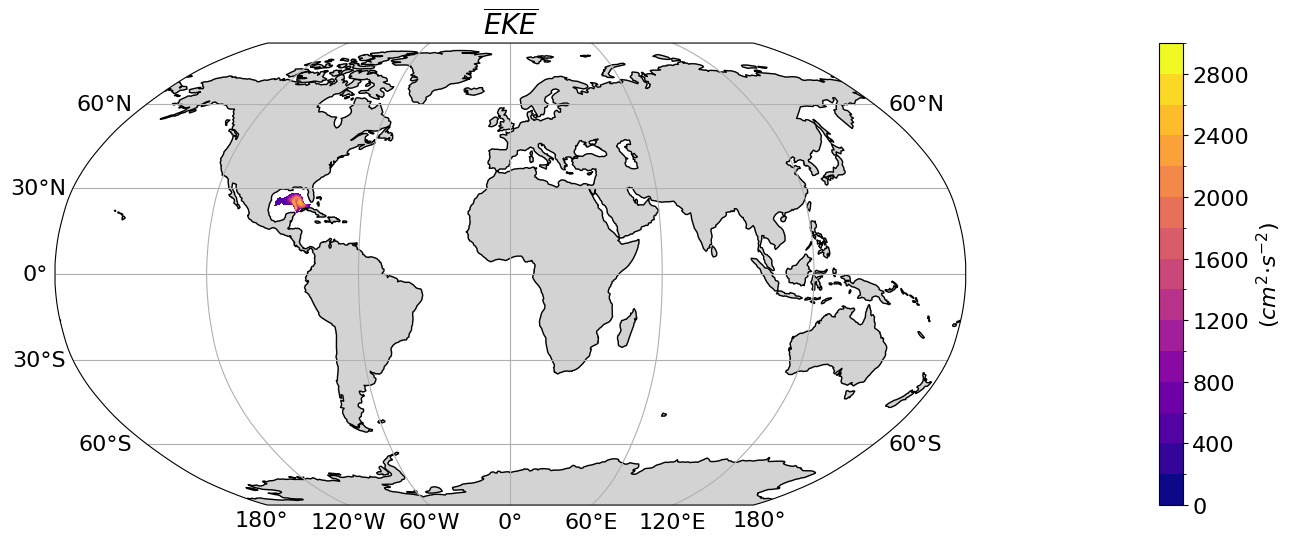

C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\3340335904.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


C:\Users\mrpal\AppData\Local\Temp\ipykernel_21756\3340335904.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


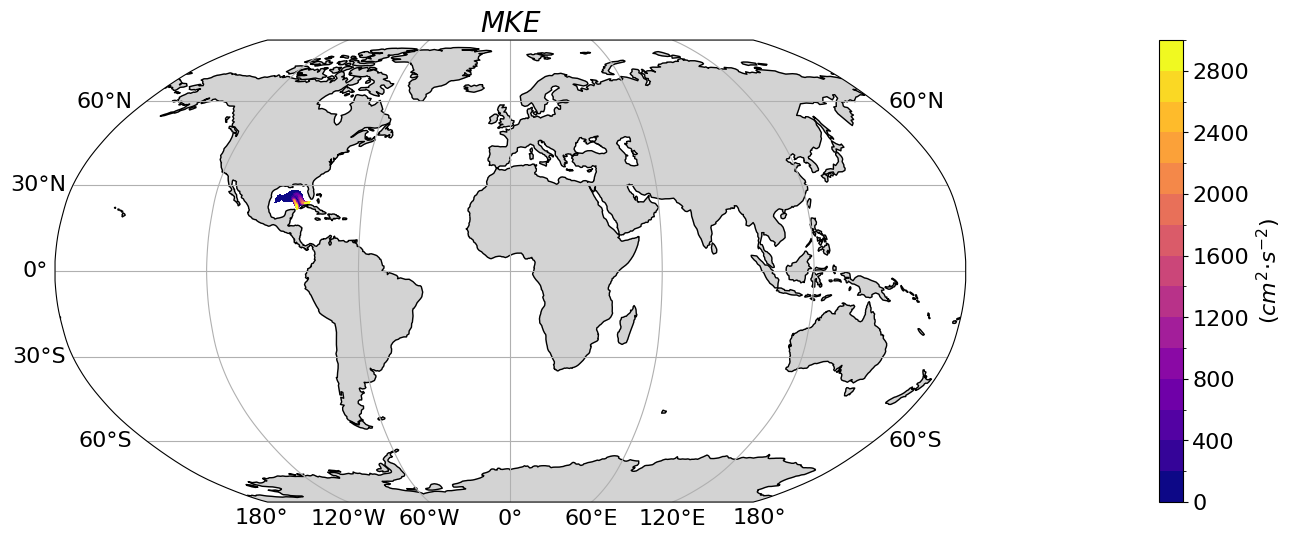

In [32]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_loop , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_loop , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_loop , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\919215583.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\919215583.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\919215583.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


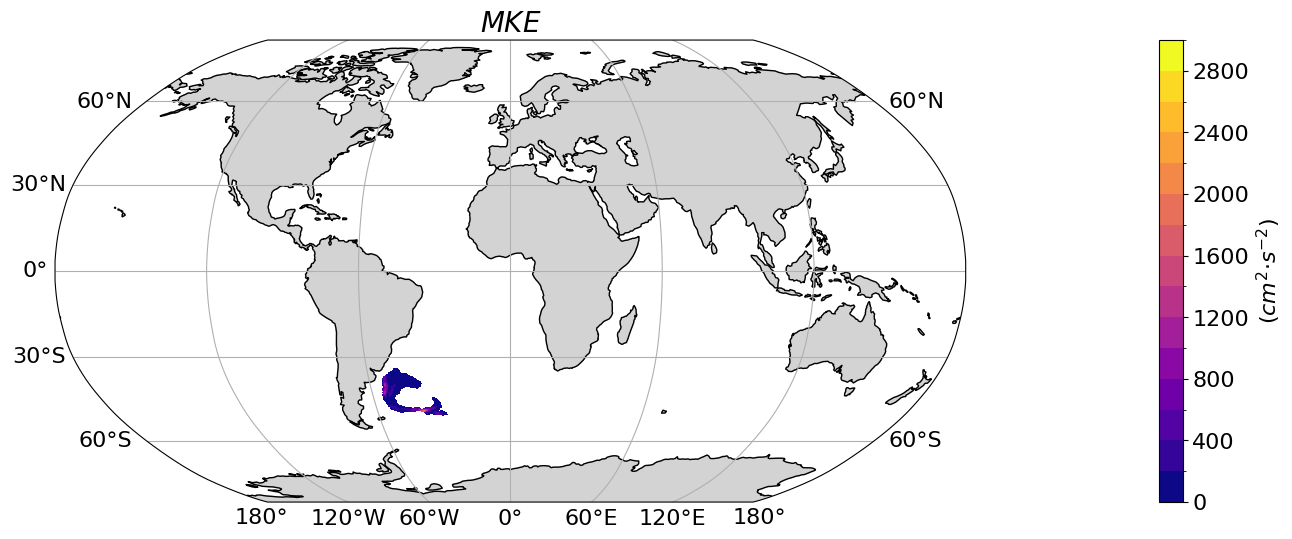

In [39]:
plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_BMC , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_BMC , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_BMC , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\1194826930.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


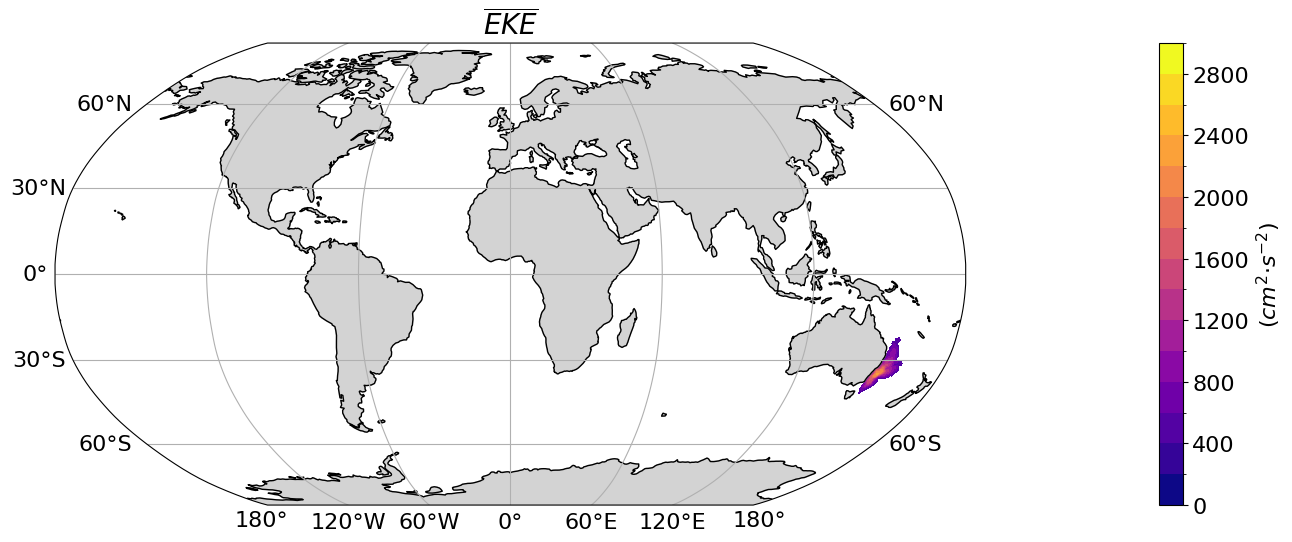

C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\1194826930.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


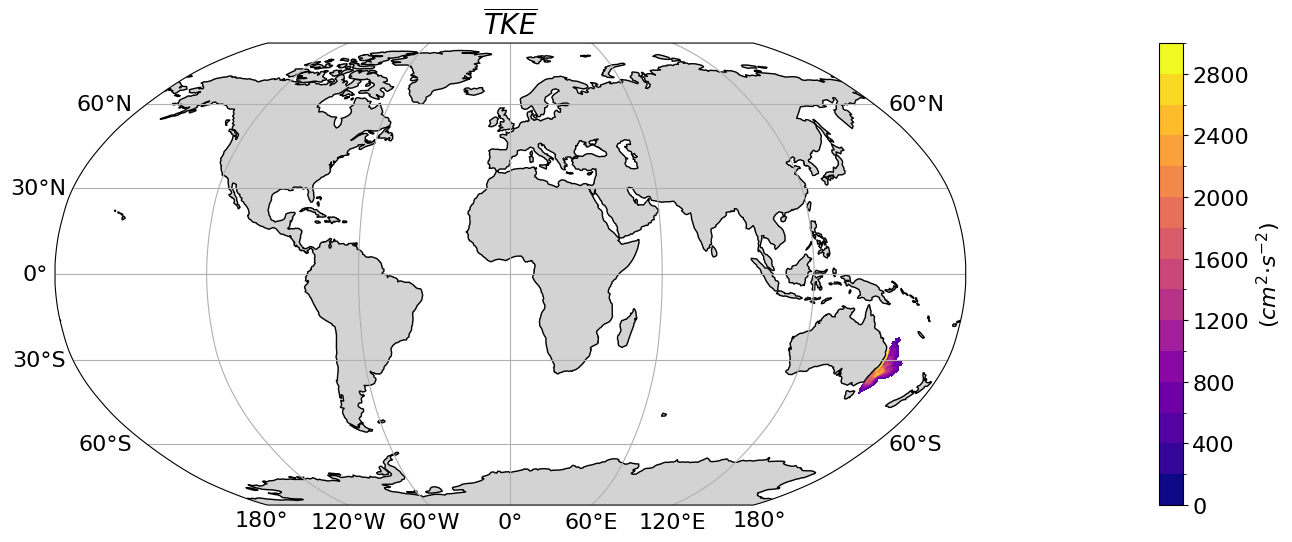

C:\Users\mrpal\AppData\Local\Temp\ipykernel_17836\1194826930.py:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))


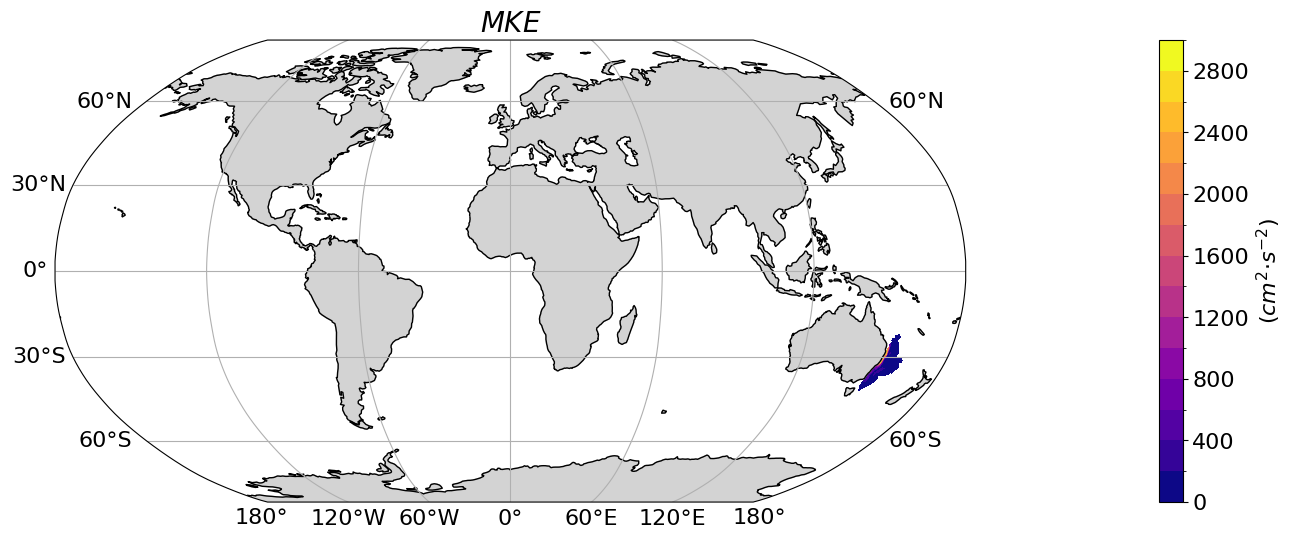

In [ ]:

plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_EKE_EAC , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{EKE}$', fontsize=20)

plt.show()



plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, mean_TKE_EAC , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$\overline{TKE}$', fontsize=20)

plt.show()


plt.figure(figsize=(50, 6))

bounds = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
cmp = plt.get_cmap('plasma')
norm = mpl.colors.BoundaryNorm(bounds, cmp.N)


ax = plt.axes(projection=ccrs.Robinson())
gl = ax.gridlines(draw_labels=True)

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land)
ax.add_feature(cfeature.COASTLINE)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}


contour_plot = ax.contourf(longitude, latitude, MKE_EAC , bounds, cmap=cmp, norm=norm, extend='max', transform=ccrs.PlateCarree())


cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmp, norm=norm))
cbar.set_label(r'$(cm^2·s^{-2})$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.title(r'$MKE}$', fontsize=20)

plt.show()

## Mean

In [24]:
#Gulf Stream
MKE_gulf_stream_MEAN = np.nanmean(MKE_gulf_stream)
mean_TKE_gulf_stream_MEAN = np.nanmean(mean_TKE_gulf_stream)
mean_EKE_gulf_stream_MEAN = np.nanmean(mean_EKE_gulf_stream)

Ratio_MKE_TKE_gulf_stream = MKE_gulf_stream_MEAN/mean_TKE_gulf_stream_MEAN *100
Ratio_EKE_TKE_gulf_stream = mean_EKE_gulf_stream_MEAN/mean_TKE_gulf_stream_MEAN *100

print('Gulf Stream: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_gulf_stream)
print('Gulf Stream: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_gulf_stream)


#Agulhas Current
MKE_agulhas_MEAN = np.nanmean(MKE_agulhas)
mean_TKE_agulhas_MEAN = np.nanmean(mean_TKE_agulhas)
mean_EKE_agulhas_MEAN = np.nanmean(mean_EKE_agulhas)

Ratio_MKE_TKE_agulhas = MKE_agulhas_MEAN/mean_TKE_agulhas_MEAN *100
Ratio_EKE_TKE_agulhas = mean_EKE_agulhas_MEAN/mean_TKE_agulhas_MEAN *100

print('Agulhas Current: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_agulhas)
print('Agulhas Current: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_agulhas)

#Kuroshio Extension
MKE_kuroshio_MEAN = np.nanmean(MKE_kuroshio)
mean_TKE_kuroshio_MEAN = np.nanmean(mean_TKE_kuroshio)
mean_EKE_kuroshio_MEAN = np.nanmean(mean_EKE_kuroshio)

Ratio_MKE_TKE_kuroshio = MKE_kuroshio_MEAN/mean_TKE_kuroshio_MEAN *100
Ratio_EKE_TKE_kuroshio = mean_EKE_kuroshio_MEAN/mean_TKE_kuroshio_MEAN *100

print('Kuroshio Extension: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_kuroshio)
print('Kuroshio Extension: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_kuroshio)

#GWSE
MKE_GWSE_MEAN = np.nanmean(MKE_GWSE)
mean_TKE_GWSE_MEAN = np.nanmean(mean_TKE_GWSE)
mean_EKE_GWSE_MEAN = np.nanmean(mean_EKE_GWSE)

Ratio_MKE_TKE_GWSE = MKE_GWSE_MEAN/mean_TKE_GWSE_MEAN *100
Ratio_EKE_TKE_GWSE = mean_EKE_GWSE_MEAN/mean_TKE_GWSE_MEAN *100

print('GWSE: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_GWSE)
print('GWSE: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_GWSE)

#Loop Current
MKE_loop_MEAN = np.nanmean(MKE_loop)
mean_TKE_loop_MEAN = np.nanmean(mean_TKE_loop)
mean_EKE_loop_MEAN = np.nanmean(mean_EKE_loop)

Ratio_MKE_TKE_loop = MKE_loop_MEAN/mean_TKE_loop_MEAN *100
Ratio_EKE_TKE_loop = mean_EKE_loop_MEAN/mean_TKE_loop_MEAN *100

print('Loop Current: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_loop)
print('Loop Current: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_loop)

#BMC
MKE_BMC_MEAN = np.nanmean(MKE_BMC)
mean_TKE_BMC_MEAN = np.nanmean(mean_TKE_BMC)
mean_EKE_BMC_MEAN = np.nanmean(mean_EKE_BMC)

Ratio_MKE_TKE_BMC = MKE_BMC_MEAN/mean_TKE_BMC_MEAN *100
Ratio_EKE_TKE_BMC = mean_EKE_BMC_MEAN/mean_TKE_BMC_MEAN *100

print('BMC: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_BMC)
print('BMC: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_BMC)

#EAC
MKE_EAC_MEAN = np.nanmean(MKE_EAC)
mean_TKE_EAC_MEAN = np.nanmean(mean_TKE_EAC)
mean_EKE_EAC_MEAN = np.nanmean(mean_EKE_EAC)

Ratio_MKE_TKE_EAC = MKE_EAC_MEAN/mean_TKE_EAC_MEAN *100
Ratio_EKE_TKE_EAC = mean_EKE_EAC_MEAN/mean_TKE_EAC_MEAN *100

print('EAC: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_EAC)
print('EAC: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_EAC)

#Rest of the regions
MKE_rest_regions_MEAN = np.nanmean(MKE_rest_regions)
mean_TKE_rest_regions_MEAN = np.nanmean(mean_TKE_rest_regions)
mean_EKE_rest_regions_MEAN = np.nanmean(mean_EKE_rest_regions)

Ratio_MKE_TKE_rest_regions = MKE_rest_regions_MEAN/mean_TKE_rest_regions_MEAN *100
Ratio_EKE_TKE_rest_regions = mean_EKE_rest_regions_MEAN/mean_TKE_rest_regions_MEAN *100

print('Rest of the regions: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE_rest_regions)
print('Rest of the regions: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE_rest_regions)

Gulf Stream: MKE mean / TKE mean *100 =  21.803612229350627
Gulf Stream: EKE mean / TKE mean *100 =  78.19638603688878
Agulhas Current: MKE mean / TKE mean *100 =  22.487864075544568
Agulhas Current: EKE mean / TKE mean *100 =  77.51213386582135
Kuroshio Extension: MKE mean / TKE mean *100 =  14.785023540597782
Kuroshio Extension: EKE mean / TKE mean *100 =  85.21497155367582
GWSE: MKE mean / TKE mean *100 =  8.445790302981178
GWSE: EKE mean / TKE mean *100 =  91.48439964388292
Loop Current: MKE mean / TKE mean *100 =  33.46834493015764
Loop Current: EKE mean / TKE mean *100 =  66.53165711407807
BMC: MKE mean / TKE mean *100 =  16.040702916724122
BMC: EKE mean / TKE mean *100 =  83.95929424902903
EAC: MKE mean / TKE mean *100 =  14.107826413393687
EAC: EKE mean / TKE mean *100 =  85.89217391234607
Rest of the regions: MKE mean / TKE mean *100 =  22.794559271744294
Rest of the regions: EKE mean / TKE mean *100 =  77.51442955972168


In [25]:
# Mean of all regions
#create a list of EKE, TKE and MKE  for all regions to later do the mean

mean_EKE_all = [mean_EKE_gulf_stream, mean_EKE_agulhas, mean_EKE_kuroshio, mean_EKE_GWSE, mean_EKE_loop, mean_EKE_BMC, mean_EKE_EAC]
mean_TKE_all = [mean_TKE_gulf_stream, mean_TKE_agulhas, mean_TKE_kuroshio, mean_TKE_GWSE, mean_TKE_loop, mean_TKE_BMC, mean_TKE_EAC]
MKE_all = [MKE_gulf_stream, MKE_agulhas, MKE_kuroshio, MKE_GWSE, MKE_loop, MKE_BMC, MKE_EAC]

# Convert lists to numpy arrays
mean_EKE_all = np.array(mean_EKE_all)
mean_TKE_all = np.array(mean_TKE_all)
MKE_all = np.array(MKE_all)

# Calculate the mean of all regions
mean_EKE_all_mean = np.nanmean(mean_EKE_all)
mean_TKE_all_mean = np.nanmean(mean_TKE_all)
MKE_all_mean = np.nanmean(MKE_all)

# Calculate the ratio of MKE and EKE to TKE
MKE_TKE_ratio_all = MKE_all_mean / mean_TKE_all_mean
EKE_TKE_ratio_all = mean_EKE_all_mean / mean_TKE_all_mean

print('MKE mean / TKE mean *100 = ', MKE_TKE_ratio_all * 100)
print('EKE mean / TKE mean *100 = ', EKE_TKE_ratio_all * 100)

MKE mean / TKE mean *100 =  19.14147957368436
EKE mean / TKE mean *100 =  80.85552914605381


globally

In [26]:
mean_EKE_MEAN = np.nanmean(mean_EKE_final)
mean_TKE_MEAN = np.nanmean(mean_TKE_final)
MKE_MEAN = np.nanmean(MKE_final)

Ratio_MKE_TKE = MKE_MEAN/mean_TKE_MEAN *100
Ratio_EKE_TKE = mean_EKE_MEAN/mean_TKE_MEAN *100

print('Globally: MKE mean / TKE mean *100 = ', Ratio_MKE_TKE)
print('Globally: EKE mean / TKE mean *100 = ', Ratio_EKE_TKE)

Globally: MKE mean / TKE mean *100 =  24.58461301047021
Globally: EKE mean / TKE mean *100 =  75.6242100803102


In [27]:
mean_EKE_MEAN_regions = [mean_EKE_gulf_stream_MEAN, mean_EKE_agulhas_MEAN, mean_EKE_kuroshio_MEAN, mean_EKE_GWSE_MEAN, mean_EKE_loop_MEAN, mean_EKE_BMC_MEAN, mean_EKE_EAC_MEAN, mean_EKE_all_mean, mean_EKE_rest_regions_MEAN, mean_EKE_MEAN]
mean_TKE_MEAN_regions = [mean_TKE_gulf_stream_MEAN, mean_TKE_agulhas_MEAN, mean_TKE_kuroshio_MEAN, mean_TKE_GWSE_MEAN, mean_TKE_loop_MEAN, mean_TKE_BMC_MEAN, mean_TKE_EAC_MEAN, mean_TKE_all_mean, mean_TKE_rest_regions_MEAN, mean_TKE_MEAN]
MKE_MEAN_regions = [MKE_gulf_stream_MEAN, MKE_agulhas_MEAN, MKE_kuroshio_MEAN, MKE_GWSE_MEAN, MKE_loop_MEAN, MKE_BMC_MEAN, MKE_EAC_MEAN, MKE_all_mean, MKE_rest_regions_MEAN, MKE_MEAN]

# Convert lists to numpy arrays
mean_EKE_MEAN_regions = np.array(mean_EKE_MEAN_regions)
mean_TKE_MEAN_regions = np.array(mean_TKE_MEAN_regions)
MKE_MEAN_regions = np.array(MKE_MEAN_regions)

MKE_TKE_ratio_regions = MKE_MEAN_regions / mean_TKE_MEAN_regions
EKE_TKE_ratio_regions = mean_EKE_MEAN_regions / mean_TKE_MEAN_regions

print('MKE mean / TKE mean *100 = ', MKE_TKE_ratio_regions * 100)
print('EKE mean / TKE mean *100 = ', EKE_TKE_ratio_regions * 100)

MKE mean / TKE mean *100 =  [21.80361223 22.48786408 14.78502354  8.4457903  33.46834493 16.04070292
 14.10782641 19.14147957 22.79455927 24.58461301]
EKE mean / TKE mean *100 =  [78.19638604 77.51213387 85.21497155 91.48439964 66.53165711 83.95929425
 85.89217391 80.85552915 77.51442956 75.62421008]


In [28]:
regions = (
    "Gulf Stream",
    "Agulhas Current",
    "Kuroshio Extension",
    "GWSE",
    "Loop Current",
    "BMC",
    "EAC",
    "All high EKE Regions",
    "Rest of the regions",
    "Global"
)
means = {
    "EKE": EKE_TKE_ratio_regions * 100,
    "MKE": MKE_TKE_ratio_regions * 100,
}
width = 0.5


# Adjust the figure size
fig, ax1 = plt.subplots(figsize=(10, 8)) 
bottom = np.zeros(10)

for boolean, mean_values in means.items():
    p = ax1.bar(regions, mean_values, width, label=boolean, bottom=bottom)
    bottom += mean_values

ax1.set_title("MKE and EKE as a percentage of TKE", fontsize=20)
ax1.set_ylabel("(%)", fontsize=16)
ax1.yaxis.grid(True)
ax1.legend(loc="upper left")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(regions, mean_EKE_MEAN_regions, color='r', label='Mean EKE')
ax2.scatter(regions, mean_TKE_MEAN_regions, color='cyan', label='Mean TKE')
ax2.scatter(regions, MKE_MEAN_regions, color='magenta', label='Mean MKE')

ax2.set_ylabel(r'Absolute Energy $(cm^2·s^{-2})$',fontsize=16)
ax2.legend(loc="upper right")

plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

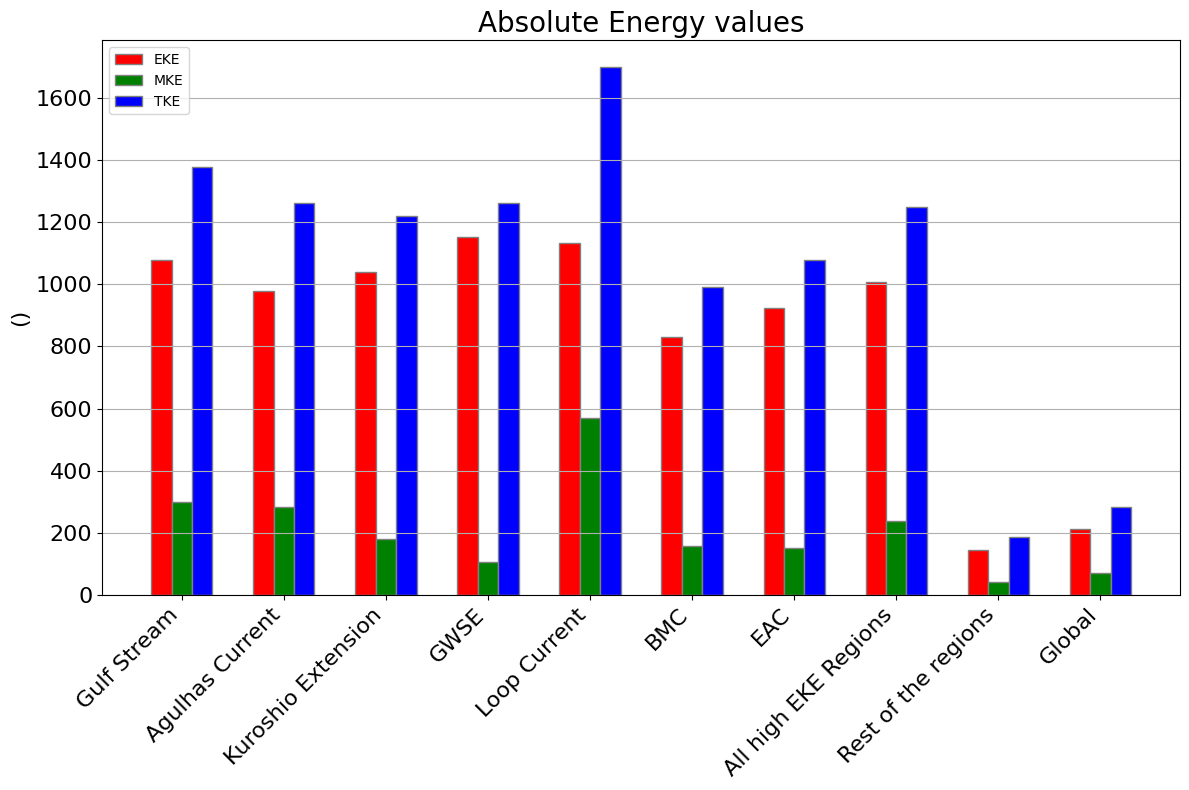

In [33]:
# Gràfic  de barres amb el valor absolut 

regions = (
    "Gulf Stream",
    "Agulhas Current",
    "Kuroshio Extension",
    "GWSE",
    "Loop Current",
    "BMC",
    "EAC",
    "All high EKE Regions",
    "Rest of the regions",
    "Global"
)
absolute_means = {
    "EKE": mean_EKE_MEAN_regions,
    "MKE": MKE_MEAN_regions,
    "TKE": mean_TKE_MEAN_regions
}
width = 0.2

br1 = np.arange(len(mean_EKE_MEAN_regions))
br2 = [x + width for x in br1]
br3 = [x + width for x in br2]

# Adjust the figure size
fig, ax1 = plt.subplots(figsize=(12, 8)) 
bottom = np.zeros(10)

plt.bar(br1, mean_EKE_MEAN_regions, color ='r', width = width, 
        edgecolor ='grey', label ='EKE') 
plt.bar(br2, MKE_MEAN_regions, color ='g', width = width, 
        edgecolor ='grey', label ='MKE') 
plt.bar(br3, mean_TKE_MEAN_regions, color ='b', width = width, 
        edgecolor ='grey', label ='TKE') 

ax1.set_title("Absolute Energy values", fontsize=20)
ax1.set_ylabel("()", fontsize=16)
ax1.yaxis.grid(True)
ax1.legend(loc="upper left")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.xticks([r + width for r in range(len(mean_EKE_MEAN_regions))],regions 
        )
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()